In [1]:
library(GLMsData)

In [2]:
data(fishfood)

In [3]:
str(fishfood)

'data.frame':	33 obs. of  6 variables:
 $ Species: Factor w/ 33 levels "Brevoortia patronus",..: 1 2 5 12 13 14 19 20 21 22 ...
 $ MaxWt  : int  362 1216 28 2 1 2 8 10 11 13 ...
 $ Temp   : int  25 18 15 25 25 25 25 25 25 25 ...
 $ AR     : num  1.69 2.31 1.42 1.65 1.05 1.62 1.28 1.11 0.93 1.28 ...
 $ Food   : Factor w/ 2 levels "C","H": 1 2 1 1 1 1 1 1 1 1 ...
 $ FoodCon: num  2.22 8.61 2.5 9.28 6.66 3.32 10.3 4.45 3.28 7.38 ...


In [4]:
fishfood

Species,MaxWt,Temp,AR,Food,FoodCon
Brevoortia patronus,362,25,1.69,C,2.22
Brevoortia tyrannus,1216,18,2.31,H,8.61
Engraulis encrasicholus,28,15,1.42,C,2.50
Hygophum proximum,2,25,1.65,C,9.28
Hygophum reindhardtii,1,25,1.05,C,6.66
Lampanyctus alatus,2,25,1.62,C,3.32
Myctophum asperum,8,25,1.28,C,10.30
Myctophum aurolaternatum,10,25,1.11,C,4.45
Myctophum nitidulum,11,25,0.93,C,3.28
Myctophum spinosum,13,25,1.28,C,7.38


In [5]:
lm.1 <- lm( log(FoodCon) ~ log(MaxWt) + log(Temp) + log(AR) + Food, data=fishfood)

In [6]:
coef(summary(lm.1))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-0.2780129,1.06855672,-0.260176,7.966317e-01
log(MaxWt),-0.2096217,0.03441292,-6.091367,1.431734e-06
log(Temp),0.6438512,0.33294164,1.933826,6.330109e-02
log(AR),0.5650509,0.21356708,2.645777,1.321841e-02
FoodH,1.4914284,0.32871545,4.537141,9.819961e-05


In [7]:
anova(lm.1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
log(MaxWt),1,14.240683,14.2406829,50.93964,9.120953e-08
log(Temp),1,5.156741,5.1567406,18.44592,1.897211e-04
log(AR),1,3.367067,3.3670667,12.04417,1.702149e-03
Food,1,5.754924,5.7549235,20.58565,9.819961e-05
Residuals,28,7.827678,0.2795599,NA,NA


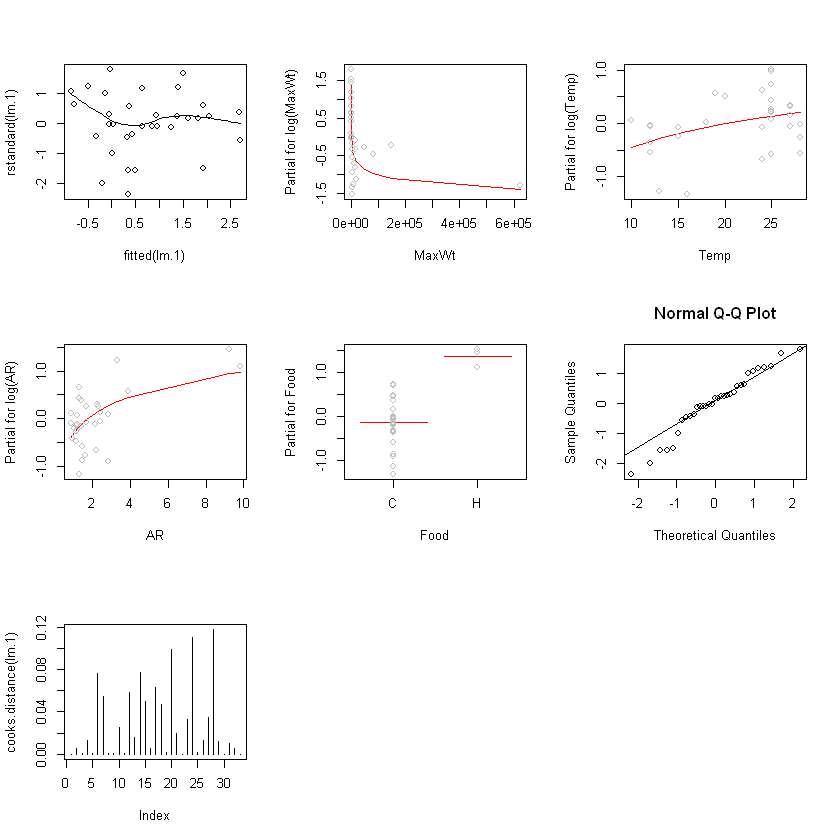

In [9]:
par(mfrow=c(3, 3))
scatter.smooth(rstandard(lm.1) ~ fitted(lm.1))
termplot(lm.1, partial.resid = TRUE, terms="log(MaxWt)")
termplot(lm.1, partial.resid = TRUE, terms="log(Temp)")
termplot(lm.1, partial.resid = TRUE, terms="log(AR)")
termplot(lm.1, partial.resid = TRUE, terms="Food")
qqnorm(rstandard(lm.1))
qqline(rstandard(lm.1))
plot(cooks.distance(lm.1), type="h")

In [11]:
lm.2 <- update(lm.1, . ~ log(MaxWt) * log(Temp) * Food * log(AR))

In [12]:
lm.2


Call:
lm(formula = log(FoodCon) ~ log(MaxWt) + log(Temp) + Food + log(AR) + 
    log(MaxWt):log(Temp) + log(MaxWt):Food + log(Temp):Food + 
    log(MaxWt):log(AR) + log(Temp):log(AR) + Food:log(AR) + log(MaxWt):log(Temp):Food + 
    log(MaxWt):log(Temp):log(AR) + log(MaxWt):Food:log(AR) + 
    log(Temp):Food:log(AR) + log(MaxWt):log(Temp):Food:log(AR), 
    data = fishfood)

Coefficients:
                       (Intercept)                          log(MaxWt)  
                           3.43635                            -0.46344  
                         log(Temp)                               FoodH  
                          -0.38136                            98.05873  
                           log(AR)                log(MaxWt):log(Temp)  
                         -15.89942                             0.05707  
                  log(MaxWt):FoodH                     log(Temp):FoodH  
                          -4.70705                           -21.54298  
                log(Max

In [13]:
lm.3 <- step(lm.2)

Start:  AIC=-38.89
log(FoodCon) ~ log(MaxWt) + log(Temp) + Food + log(AR) + log(MaxWt):log(Temp) + 
    log(MaxWt):Food + log(Temp):Food + log(MaxWt):log(AR) + log(Temp):log(AR) + 
    Food:log(AR) + log(MaxWt):log(Temp):Food + log(MaxWt):log(Temp):log(AR) + 
    log(MaxWt):Food:log(AR) + log(Temp):Food:log(AR) + log(MaxWt):log(Temp):Food:log(AR)


Step:  AIC=-38.89
log(FoodCon) ~ log(MaxWt) + log(Temp) + Food + log(AR) + log(MaxWt):log(Temp) + 
    log(MaxWt):Food + log(Temp):Food + log(MaxWt):log(AR) + log(Temp):log(AR) + 
    Food:log(AR) + log(MaxWt):log(Temp):Food + log(MaxWt):log(Temp):log(AR) + 
    log(MaxWt):Food:log(AR) + log(Temp):Food:log(AR)


Step:  AIC=-38.89
log(FoodCon) ~ log(MaxWt) + log(Temp) + Food + log(AR) + log(MaxWt):log(Temp) + 
    log(MaxWt):Food + log(Temp):Food + log(MaxWt):log(AR) + log(Temp):log(AR) + 
    Food:log(AR) + log(MaxWt):log(Temp):Food + log(MaxWt):log(Temp):log(AR) + 
    log(MaxWt):Food:log(AR)


Step:  AIC=-38.89
log(FoodCon) ~ log(MaxWt) + 

In [14]:
anova(lm.1, lm.3)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
28,7.827678,NA,NA,NA,NA
26,5.660281,2,2.167397,4.977873,0.0147797


In [16]:
coef(summary(lm.3))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),1.5471449,1.21609901,1.2722195,2.145562e-01
log(MaxWt),-0.2841462,0.03847190,-7.3858119,7.648522e-08
log(Temp),0.2259765,0.37487385,0.6028068,5.518594e-01
FoodH,1.9045248,0.33064403,5.7600459,4.581819e-06
log(AR),-6.1514727,2.28509624,-2.6919972,1.225750e-02
log(MaxWt):log(AR),0.1884935,0.06445277,2.9245220,7.063403e-03
log(Temp):log(AR),1.5917898,0.62694494,2.5389626,1.744401e-02


Warning message in termplot(lm.3, partial.resid = TRUE, terms = "log(MaxWt):log(AR)"):
"'model' appears to involve interactions: see the help page"Warning message in termplot(lm.3, partial.resid = TRUE, terms = "log(Temp):log(AR)"):
"'model' appears to involve interactions: see the help page"

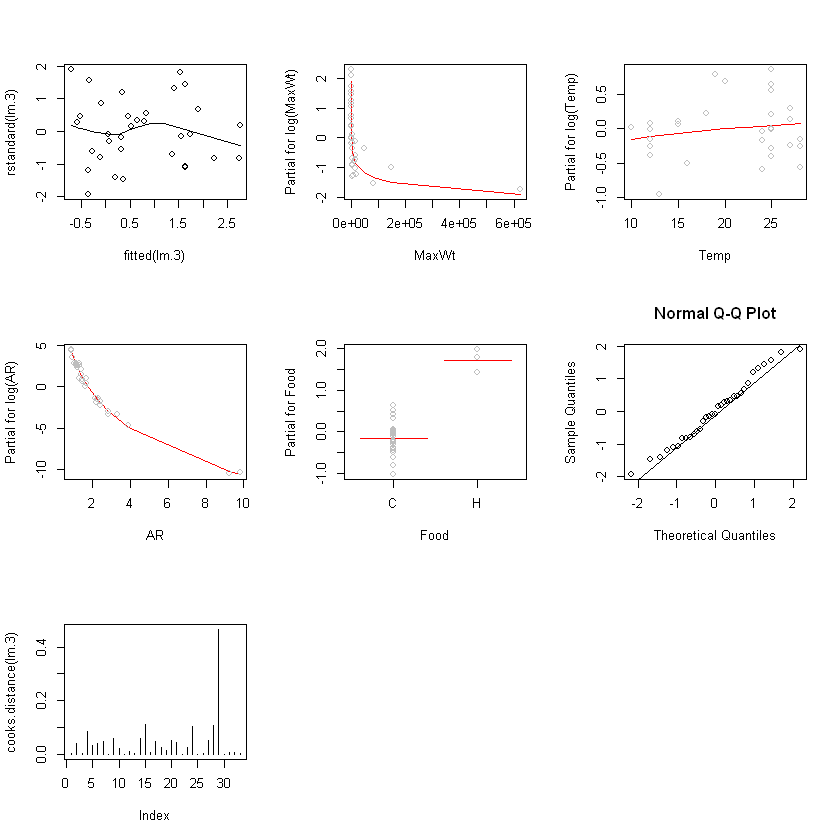

In [19]:
par(mfrow=c(3, 3))
scatter.smooth(rstandard(lm.3) ~ fitted(lm.3))
termplot(lm.3, partial.resid = TRUE, terms="log(MaxWt)")
termplot(lm.3, partial.resid = TRUE, terms="log(Temp)")
termplot(lm.3, partial.resid = TRUE, terms="log(AR)")
termplot(lm.3, partial.resid = TRUE, terms="Food")
termplot(lm.3, partial.resid = TRUE, terms="log(MaxWt):log(AR)")
termplot(lm.3, partial.resid = TRUE, terms="log(Temp):log(AR)")
qqnorm(rstandard(lm.3))
qqline(rstandard(lm.3))
plot(cooks.distance(lm.3), type="h")